# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.stats import ttest_ind
from numpy.random import seed
import math
medical = pd.read_csv('insurance2.csv')

In [5]:
medical.shape

(1338, 8)

In [7]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Mean: 13270.422265141257  
Standard deviation: 12110.011236693994

The standard deviation is very large relative to mean due to skewed data on the right. The presence of outliers is giving high standard deviation. The data is not normally distributed.

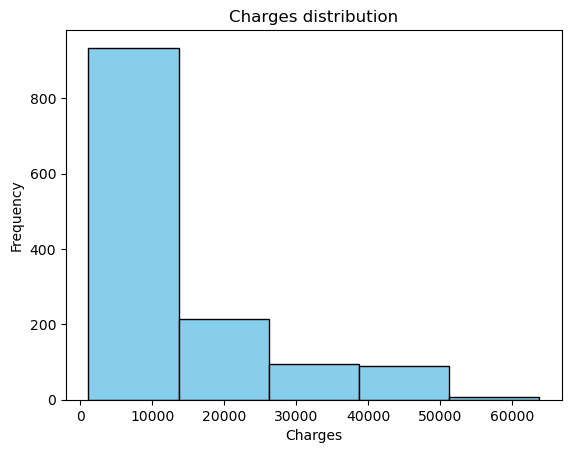

In [46]:
plt.hist(medical["charges"],bins=5, color='skyblue', edgecolor='black')
plt.title('Charges distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()

In [62]:
print("Mean:",medical['charges'].mean())
print("Standard Deviation:",medical['charges'].std())


Mean: 13270.422265141257
Standard Deviation: 12110.011236693994


__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ Mean of the sample is 13270.42. Here the sampling is random and the sample size is large. So by law of large numbers and by central limit theorem, the sample mean is a reliable estimator of the population mean.

Here, population standard deviation is unknown. So t-test can be applied. Since sample size is large, both z test and t test will give similar results.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ Since the administrator has one sided concern( charges below 12000), we can do one sided( left) confidence interval in this case. 

Here, for 95% confidence interval, one sided, t_critical = -1.646  with alpha = 0.05
Lets say null hypothesis is mu >= 12000
from the calculation as shown below, t statistic is obtained as 3.84 which is greater than critical value -1.645
Hence we fail to reject the null hypothesis.
**At the 5% significance level, there is not enough evidence to conclude that the population mean is less than 12,000.**

**So the administrator shold not be concerned as the average charge is above 12000.**



In [9]:
n = 1338 #sample size
s = 12110.01 # sample standard deviation
x_bar = 13270.42 #sample mean
mu = 12000 

#calculate standard error
se  = s/math.sqrt(n)
print("standard error", se)
#calculatetest statistics
t = (x_bar-mu)/se
print("test statistic",t)
df = n -1 #degrees of freedom
t_critical = -1.645 #for 95% confidence interval, one sided with alpha = 0.05



standard error 331.06742050653673
test statistic 3.8373452696017134


The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ null hypothesis, mu0=mu1
alternate hypothesis, mu0 is not equl to mu1
we are assuming that two populations(with or without insurance) have same variance. That is the reason for pooled standard deviation.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__  from the scipy.stats and manually, we got the same t statistic and p value is extremely small, indicating that two means are statistically very different.

In [59]:
#samples with or without insurance
sample0 = medical[(medical['insuranceclaim'] == 0)]
sample1 = medical[(medical['insuranceclaim'] == 1)]

#sample size for people without and with insurance
n0 = sample0.shape[0] 
n1 = sample1.shape[0] 

#sample standard deviation for without and with insurance
s0 = sample0['charges'].std() 
s1 = sample1['charges'].std()

#sample mean for without and with insurance
x0 = sample0['charges'].mean()
x1 = sample1['charges'].mean()
print("n0:",n0,"n1:",n1,"s0:",s0,"s1:",s1,"x0",x0,"x1:",x1)

n0: 555 n1: 783 s0: 6446.510126811736 s1: 14045.928418802127 x0 8821.421892306305 x1: 16423.928276537677


In [43]:
#manual hypothesis test
#pooled standard deviation 
sp= math.sqrt(((n0-1)*(s0**2) + (n1-1)*(s1**2))/(n0+n1-2))
#t-test statistic
t = (x0-x1)/(sp*math.sqrt((1/n0)+(1/n1)))
print('pooled sd',sp)
print('t-test statistic',t)
              

pooled sd 11520.034268775256
t-test statistic -11.893299030876715


from the manual test, t is obtained as -11.89  
t critical is 1.96 for 95% confidence interval, two sided test  
since |t| is greater than t critical, null hypothesis is rejected.  

for the calculated t statistic, p value is less than 0.0001  

that is charge for with insurance and without insurance are different.

In [51]:
#using ttest_ind from scipy.stats to calculate p value and t statistics
t_stat, p_val = ttest_ind(sample0['charges'], sample1['charges'], equal_var=True)
print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: -11.893299030876712
p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, you don't such function for z test. z-test requires knowing population standard deviation which is rarely known. Hence the function is not 

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test